<a href="https://colab.research.google.com/github/Pravalika1812/Consumer-Complaint-Classification/blob/main/Baseline_6_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#Mount to drive
#Easy access to files stored in your Google Drive
#Allowing you to read and write data directly from and to your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Loading a training dataset in JSON format using the pandas library in Python.
file_path = r'/content/drive/MyDrive/NLP/NLP_PROJECT3/filtered_complaints_train_data.csv'
train_data = pd.read_csv(file_path)
# Display the content of the dataset.
train_data

,Unnamed: 0,Date received,narrative,product_category
0,0,2022-04-07,"['please', 'advised', 'listed', 'recently', 'r...",credit_reporting
1,1,2023-11-05,"['approved', 'grant', 'haf', 'cover', 'mortgag...",mortgages_and_loans
2,2,2023-07-10,"['victim', 'trading', 'years', 'finally', 'got...",debt_collection
3,3,2021-12-10,"['reviewing', 'credit', 'card', 'statement', '...",credit_card
4,4,2023-08-06,"['placed', 'order', 'curling', 'irons', 'via',...",credit_card
...,...,...,...,...
139995,139995,2023-08-19,"['ive', 'dealing', 'situation', 'since', 'last...",credit_card
139996,139996,2022-08-31,"['everytime', 'purchase', 'involve', 'credit',...",credit_reporting
139997,139997,2023-07-17,"['issue', 'regard', 'phh', 'mortgage', 'servic...",mortgages_and_loans
139998,139998,2022-06-02,"['told', 'could', 'open', 'checking', 'account...",retail_banking


In [ ]:
# Loading a testing dataset in JSON format using the pandas library in Python.
file_path = r'/content/drive/MyDrive/NLP/NLP_PROJECT3/filtered_complaints_test_data.csv'
test_data = pd.read_csv(file_path)
# Display the content of the dataset.
test_data

,Unnamed: 0,Date received,narrative,product_category
0,0,2022-04-07,"['please', 'advised', 'listed', 'recently', 'r...",credit_reporting
1,1,2023-11-05,"['approved', 'grant', 'haf', 'cover', 'mortgag...",mortgages_and_loans
2,2,2023-07-10,"['victim', 'trading', 'years', 'finally', 'got...",debt_collection
3,3,2021-12-10,"['reviewing', 'credit', 'card', 'statement', '...",credit_card
4,4,2023-08-06,"['placed', 'order', 'curling', 'irons', 'via',...",credit_card
...,...,...,...,...
4995,4995,2022-09-19,"['alerted', 'sunshine', 'debt', 'trying', 'col...",debt_collection
4996,4996,2023-09-08,"['paid', 'electric', 'bill', 'placed', 'wrong'...",retail_banking
4997,4997,2023-10-27,"['around', 'opened', 'wells', 'fargo', 'everyd...",retail_banking
4998,4998,2022-12-04,"['writing', 'dispute', 'following', 'informati...",credit_reporting


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        140000 non-null  int64 
 1   Date received     140000 non-null  object
 2   narrative         140000 non-null  object
 3   product_category  140000 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.3+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5000 non-null   int64 
 1   Date received     5000 non-null   object
 2   narrative         5000 non-null   object
 3   product_category  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [ ]:
#Remove the specified columns from the train dataset that are not relevant to the task.
columns_to_drop = ['Unnamed: 0']
train_data.drop(columns=columns_to_drop, inplace=True)
train_data.head()

,Date received,narrative,product_category
0,2022-04-07,"['please', 'advised', 'listed', 'recently', 'r...",credit_reporting
1,2023-11-05,"['approved', 'grant', 'haf', 'cover', 'mortgag...",mortgages_and_loans
2,2023-07-10,"['victim', 'trading', 'years', 'finally', 'got...",debt_collection
3,2021-12-10,"['reviewing', 'credit', 'card', 'statement', '...",credit_card
4,2023-08-06,"['placed', 'order', 'curling', 'irons', 'via',...",credit_card


In [ ]:
#Remove the specified columns from the train dataset that are not relevant to the task.
columns_to_drop = ['Unnamed: 0']
test_data.drop(columns=columns_to_drop, inplace=True)
test_data.head()

,Date received,narrative,product_category
0,2022-04-07,"['please', 'advised', 'listed', 'recently', 'r...",credit_reporting
1,2023-11-05,"['approved', 'grant', 'haf', 'cover', 'mortgag...",mortgages_and_loans
2,2023-07-10,"['victim', 'trading', 'years', 'finally', 'got...",debt_collection
3,2021-12-10,"['reviewing', 'credit', 'card', 'statement', '...",credit_card
4,2023-08-06,"['placed', 'order', 'curling', 'irons', 'via',...",credit_card


In [ ]:
type(np.array(train_data['narrative']))

numpy.ndarray

In [ ]:
train_data['product_category'].unique()

array(['credit_reporting', 'mortgages_and_loans', 'debt_collection',
       'credit_card', 'retail_banking'], dtype=object)

In [ ]:
product_dict ={'credit_reporting': 1, 'debt_collection': 2, 'mortgages_and_loans': 3,
               'credit_card': 0, 'retail_banking': 4}

In [ ]:
train_data['product_category'].replace(product_dict, inplace=True)

In [ ]:
train_data

,Date received,narrative,product_category
0,2022-04-07,"['please', 'advised', 'listed', 'recently', 'r...",1
1,2023-11-05,"['approved', 'grant', 'haf', 'cover', 'mortgag...",3
2,2023-07-10,"['victim', 'trading', 'years', 'finally', 'got...",2
3,2021-12-10,"['reviewing', 'credit', 'card', 'statement', '...",0
4,2023-08-06,"['placed', 'order', 'curling', 'irons', 'via',...",0
...,...,...,...
139995,2023-08-19,"['ive', 'dealing', 'situation', 'since', 'last...",0
139996,2022-08-31,"['everytime', 'purchase', 'involve', 'credit',...",1
139997,2023-07-17,"['issue', 'regard', 'phh', 'mortgage', 'servic...",3
139998,2022-06-02,"['told', 'could', 'open', 'checking', 'account...",4


In [ ]:
test_data['product_category'].replace(product_dict, inplace=True)
test_data

,Date received,narrative,product_category
0,2022-04-07,"['please', 'advised', 'listed', 'recently', 'r...",1
1,2023-11-05,"['approved', 'grant', 'haf', 'cover', 'mortgag...",3
2,2023-07-10,"['victim', 'trading', 'years', 'finally', 'got...",2
3,2021-12-10,"['reviewing', 'credit', 'card', 'statement', '...",0
4,2023-08-06,"['placed', 'order', 'curling', 'irons', 'via',...",0
...,...,...,...
4995,2022-09-19,"['alerted', 'sunshine', 'debt', 'trying', 'col...",2
4996,2023-09-08,"['paid', 'electric', 'bill', 'placed', 'wrong'...",4
4997,2023-10-27,"['around', 'opened', 'wells', 'fargo', 'everyd...",4
4998,2022-12-04,"['writing', 'dispute', 'following', 'informati...",1


In [ ]:
train_data['product_category'].unique()

array([1, 3, 2, 0, 4])

In [ ]:
train_data = train_data.dropna()

In [ ]:
test_data = test_data.dropna()

In [ ]:
Xtrain = train_data['narrative']
ytrain = train_data['product_category']

In [ ]:
Xtest = test_data['narrative']
ytest = test_data['product_category']

In [ ]:
Xtrain

0         ['please', 'advised', 'listed', 'recently', 'r...
1         ['approved', 'grant', 'haf', 'cover', 'mortgag...
2         ['victim', 'trading', 'years', 'finally', 'got...
3         ['reviewing', 'credit', 'card', 'statement', '...
4         ['placed', 'order', 'curling', 'irons', 'via',...
                                ...                        
139995    ['ive', 'dealing', 'situation', 'since', 'last...
139996    ['everytime', 'purchase', 'involve', 'credit',...
139997    ['issue', 'regard', 'phh', 'mortgage', 'servic...
139998    ['told', 'could', 'open', 'checking', 'account...
139999    ['despite', 'multiple', 'written', 'requests',...
Name: narrative, Length: 140000, dtype: object

In [ ]:
ytrain

0         1
1         3
2         2
3         0
4         0
         ..
139995    0
139996    1
139997    3
139998    4
139999    1
Name: product_category, Length: 140000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
# Used for splitting datasets into training and testing sets.
X_train, X_valid, y_train, y_valid = train_test_split(Xtrain, ytrain, test_size=0.20, random_state=200)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt

In [ ]:
from sklearn.pipeline import make_pipeline
# Training the model
MNB_classifier = make_pipeline(TfidfVectorizer(), MultinomialNB())
MNB_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
#To make predictions on the validation set.
y_valid_pred = MNB_classifier.predict(X_valid)

In [ ]:
# calculate the accuracy of the classifier's predictions on the validation set.
y_valid_pred_accuracy = accuracy_score(y_valid, y_valid_pred)
y_valid_pred_accuracy

0.8115

In [ ]:
# Make predictions on the test set.
y_test_pred = MNB_classifier.predict(Xtest)

In [ ]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(ytest, y_test_pred)
y_test_pred_accuracy

0.8182

In [ ]:
# classification report for the validation set
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      5599
           1       0.80      0.82      0.81      5643
           2       0.81      0.72      0.76      5528
           3       0.85      0.86      0.85      5569
           4       0.82      0.89      0.86      5661

    accuracy                           0.81     28000
   macro avg       0.81      0.81      0.81     28000
weighted avg       0.81      0.81      0.81     28000



In [ ]:
# confusion matrix for the validation set
print(confusion_matrix(y_valid, y_valid_pred))

[[4316  251  175  147  710]
 [ 285 4608  482  212   56]
 [ 302  697 3968  396  165]
 [ 217  176  235 4779  162]
 [ 425   23   48  114 5051]]


In [ ]:
# classification report for the test set
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       972
           1       0.80      0.81      0.80      1028
           2       0.80      0.74      0.77       990
           3       0.86      0.86      0.86       979
           4       0.85      0.90      0.87      1031

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



In [ ]:
# confusion matrix for the test set
print(confusion_matrix(ytest, y_test_pred))

[[759  53  30  19 111]
 [ 50 828 104  39   7]
 [ 50 119 734  65  22]
 [ 32  37  42 840  28]
 [ 74   2  11  14 930]]


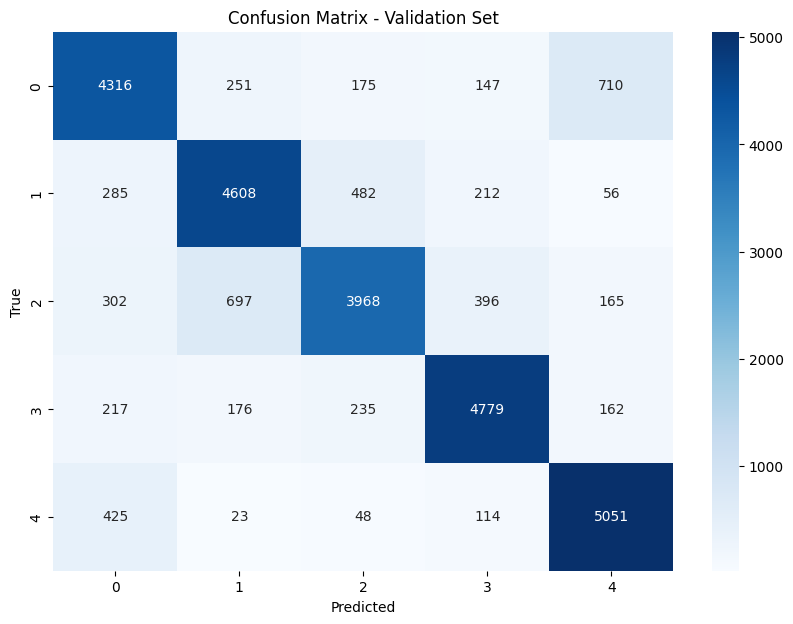

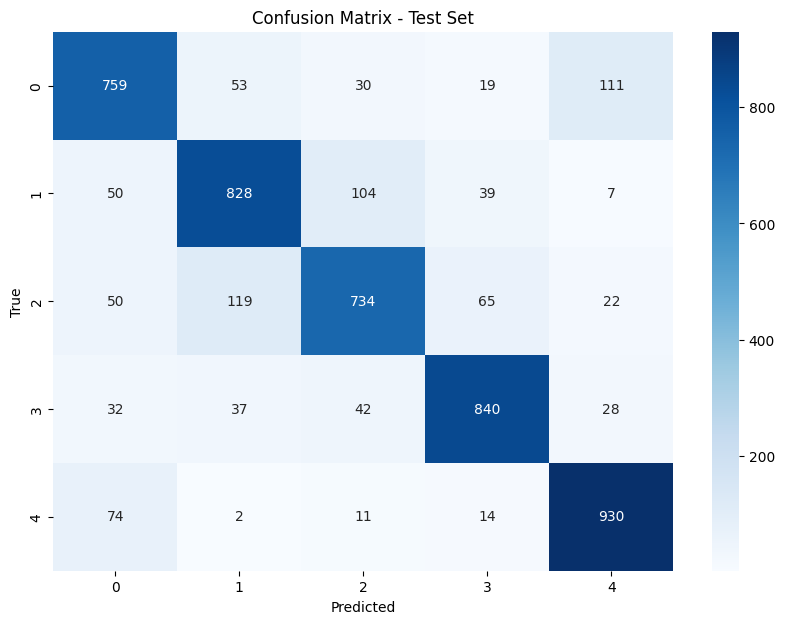

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report for the validation set
valid_class_report = classification_report(y_valid, y_valid_pred, output_dict=True)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Classification report for the test set
test_class_report = classification_report(ytest, y_test_pred, output_dict=True)
test_conf_matrix = confusion_matrix(ytest, y_test_pred)

# Convert classification report to DataFrame for easier plotting
valid_class_report_df = pd.DataFrame(valid_class_report).transpose()
test_class_report_df = pd.DataFrame(test_class_report).transpose()



# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 7))
sns.heatmap(valid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# RANDOM FOREST


In [ ]:
from sklearn.pipeline import make_pipeline
# Training the model
rf_classifier = make_pipeline(TfidfVectorizer(), RandomForestClassifier(max_depth=20))
rf_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20))])

In [ ]:
#To make predictions on the validation set.
y_valid_pred = rf_classifier.predict(X_valid)

In [ ]:
# calculate the accuracy of the classifier's predictions on the validation set.
y_valid_pred_accuracy = accuracy_score(y_valid, y_valid_pred)
y_valid_pred_accuracy

0.8114285714285714

In [ ]:
# Make predictions on the test set.
y_test_pred = rf_classifier.predict(Xtest)

In [ ]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(ytest, y_test_pred)
y_test_pred_accuracy

0.8468

In [ ]:
# classification report for the validation set
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      5599
           1       0.81      0.82      0.82      5643
           2       0.77      0.75      0.76      5528
           3       0.85      0.85      0.85      5569
           4       0.81      0.90      0.85      5661

    accuracy                           0.81     28000
   macro avg       0.81      0.81      0.81     28000
weighted avg       0.81      0.81      0.81     28000



In [ ]:
# confusion matrix for the validation set
print(confusion_matrix(y_valid, y_valid_pred))

[[4120  273  256  174  776]
 [ 174 4655  554  210   50]
 [ 230  629 4149  369  151]
 [ 149  173  318 4728  201]
 [ 335   32  122  104 5068]]


In [ ]:
# classification report for the test set
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       972
           1       0.84      0.84      0.84      1028
           2       0.80      0.81      0.80       990
           3       0.88      0.87      0.87       979
           4       0.86      0.92      0.89      1031

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [ ]:
# confusion matrix for the test set
print(confusion_matrix(ytest, y_test_pred))

[[771  39  42  21  99]
 [ 27 868  92  35   6]
 [ 32  96 797  45  20]
 [ 22  31  47 847  32]
 [ 44   5  18  13 951]]


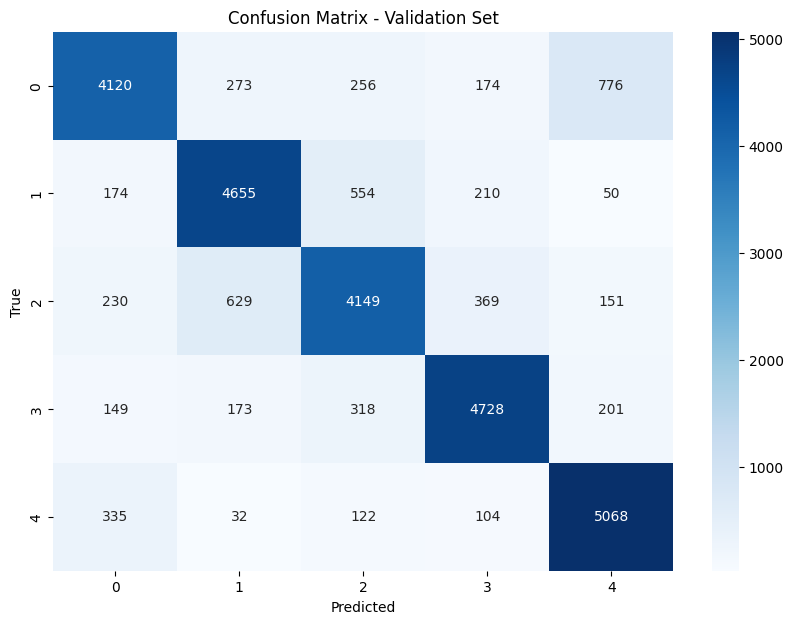

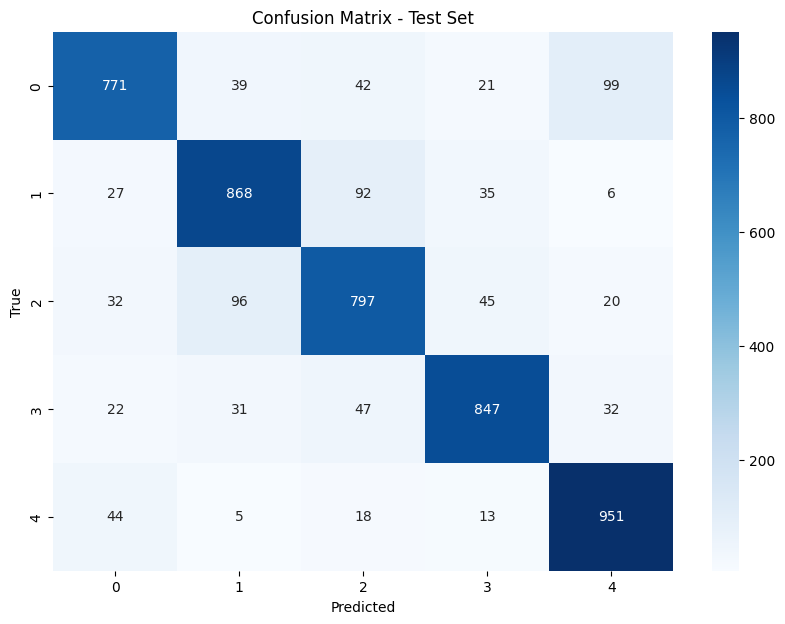

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report for the validation set
valid_class_report = classification_report(y_valid, y_valid_pred, output_dict=True)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Classification report for the test set
test_class_report = classification_report(ytest, y_test_pred, output_dict=True)
test_conf_matrix = confusion_matrix(ytest, y_test_pred)

# Convert classification report to DataFrame for easier plotting
valid_class_report_df = pd.DataFrame(valid_class_report).transpose()
test_class_report_df = pd.DataFrame(test_class_report).transpose()



# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 7))
sns.heatmap(valid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Function for making predictions on new complaints
def predict_complaint(complaint_text):
    prediction = MNB_classifier.predict([complaint_text])[0]
    for category, code in product_dict.items():
        if code == prediction:
            return category
    return "Unknown category"

# Function to take user input and classify the complaint
def classify_user_input():
    while True:
        user_input = input("Enter a complaint (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            break
        predicted_category = predict_complaint(user_input)
        print(f"The predicted category for the complaint is: {predicted_category}")

# Start the user input loop
classify_user_input()

Enter a complaint (or type 'exit' to quit): I was charged twice for the same purchase on my credit card, and now my account is overdrawn. I called customer service multiple times, but they haven't resolved the issue.
The predicted category for the complaint is: credit_card
Enter a complaint (or type 'exit' to quit): I keep getting calls from a debt collection agency about a loan that I don't owe. They are threatening legal action, and it's causing me a lot of stress.
The predicted category for the complaint is: debt_collection
Enter a complaint (or type 'exit' to quit): There are several unauthorized transactions in my checking account. I reported the fraud to my bank, but they haven't refunded my money or stopped the fraudulent activity.
The predicted category for the complaint is: retail_banking
Enter a complaint (or type 'exit' to quit): My mortgage payment was not applied correctly, and now I'm being charged late fees. I've tried contacting my loan provider, but they haven't fixed 

# DECISION TREE


In [ ]:
from sklearn.pipeline import make_pipeline
# Training the model
dtree_classifier = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(max_depth=20))
dtree_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=20))])

In [ ]:
#To make predictions on the validation set.
y_valid_pred = dtree_classifier.predict(X_valid)

In [ ]:
# calculate the accuracy of the classifier's predictions on the validation set.
y_valid_pred_accuracy = accuracy_score(y_valid, y_valid_pred)
y_valid_pred_accuracy

0.7498571428571429

In [ ]:
# Make predictions on the test set.
y_test_pred = dtree_classifier.predict(Xtest)

In [ ]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(ytest, y_test_pred)
y_test_pred_accuracy

0.8274

In [ ]:
# classification report for the validation set
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      5599
           1       0.79      0.75      0.77      5643
           2       0.68      0.72      0.70      5528
           3       0.83      0.77      0.80      5569
           4       0.77      0.79      0.78      5661

    accuracy                           0.75     28000
   macro avg       0.75      0.75      0.75     28000
weighted avg       0.75      0.75      0.75     28000



In [ ]:
# confusion matrix for the validation set
print(confusion_matrix(y_valid, y_valid_pred))

[[4053  235  427  192  692]
 [ 397 4241  676  199  130]
 [ 419  590 3962  315  242]
 [ 291  237  488 4285  268]
 [ 664   77  266  199 4455]]


In [ ]:
# classification report for the test set
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       972
           1       0.85      0.81      0.83      1028
           2       0.76      0.82      0.79       990
           3       0.89      0.84      0.87       979
           4       0.86      0.87      0.86      1031

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [ ]:
# confusion matrix for the test set
print(confusion_matrix(ytest, y_test_pred))

[[771  37  63  20  81]
 [ 66 837  85  27  13]
 [ 46  74 808  31  31]
 [ 43  24  62 826  24]
 [ 62   7  48  19 895]]


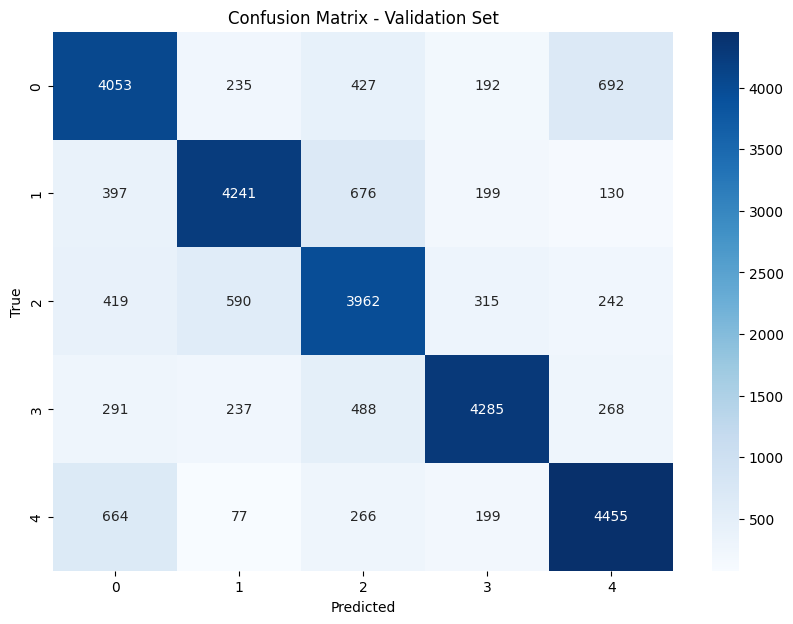

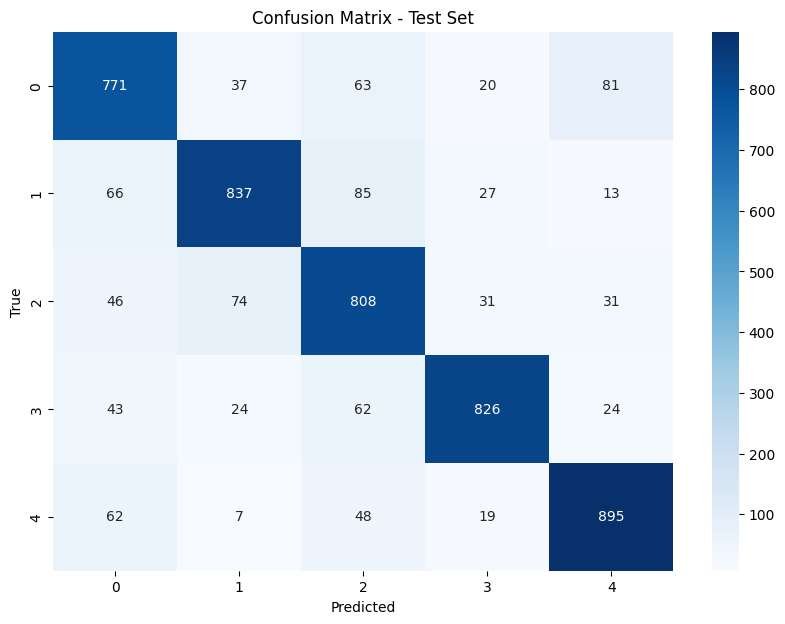

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report for the validation set
valid_class_report = classification_report(y_valid, y_valid_pred, output_dict=True)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Classification report for the test set
test_class_report = classification_report(ytest, y_test_pred, output_dict=True)
test_conf_matrix = confusion_matrix(ytest, y_test_pred)

# Convert classification report to DataFrame for easier plotting
valid_class_report_df = pd.DataFrame(valid_class_report).transpose()
test_class_report_df = pd.DataFrame(test_class_report).transpose()



# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 7))
sns.heatmap(valid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN

In [ ]:
from sklearn.pipeline import make_pipeline
# Training the model
knn_classifier = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=5, weights='distance'))
knn_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [ ]:
import joblib
joblib.dump(knn_classifier, '/content/drive/MyDrive/NLP/NLP_PROJECT3/KNN.pth')

['/content/drive/MyDrive/NLP/NLP_PROJECT3/KNN.pth']

In [ ]:
#To make predictions on the validation set.
y_valid_pred = knn_classifier.predict(X_valid)

In [ ]:
# calculate the accuracy of the classifier's predictions on the validation set.
y_valid_pred_accuracy = accuracy_score(y_valid, y_valid_pred)
y_valid_pred_accuracy

0.337

In [ ]:
# Make predictions on the test set.
y_test_pred = knn_classifier.predict(Xtest)

In [ ]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(ytest, y_test_pred)
y_test_pred_accuracy

0.8746

In [ ]:
# classification report for the validation set
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.75      0.15      0.26      5599
           1       0.23      0.96      0.38      5643
           2       0.83      0.23      0.35      5528
           3       0.83      0.16      0.26      5569
           4       0.82      0.19      0.30      5661

    accuracy                           0.34     28000
   macro avg       0.69      0.34      0.31     28000
weighted avg       0.69      0.34      0.31     28000



In [ ]:
# confusion matrix for the validation set
print(confusion_matrix(y_valid, y_valid_pred))

[[ 867 4511   47   38  136]
 [  53 5396  150   40    4]
 [  76 4115 1244   67   26]
 [  58 4529   49  873   60]
 [ 101 4456   17   31 1056]]


In [ ]:
# classification report for the test set
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       972
           1       0.63      0.99      0.77      1028
           2       0.98      0.86      0.92       990
           3       0.99      0.85      0.91       979
           4       0.99      0.84      0.91      1031

    accuracy                           0.87      5000
   macro avg       0.92      0.87      0.88      5000
weighted avg       0.91      0.87      0.88      5000



In [ ]:
# confusion matrix for the test set
print(confusion_matrix(ytest, y_test_pred))

[[ 819  142    1    4    6]
 [   2 1014   10    2    0]
 [   4  134  848    3    1]
 [   2  147    1  829    0]
 [   4  162    2    0  863]]


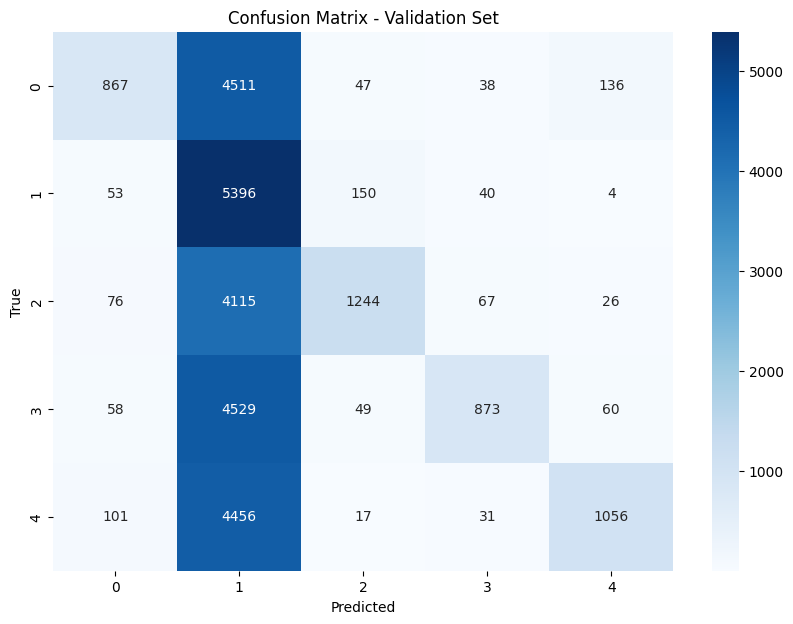

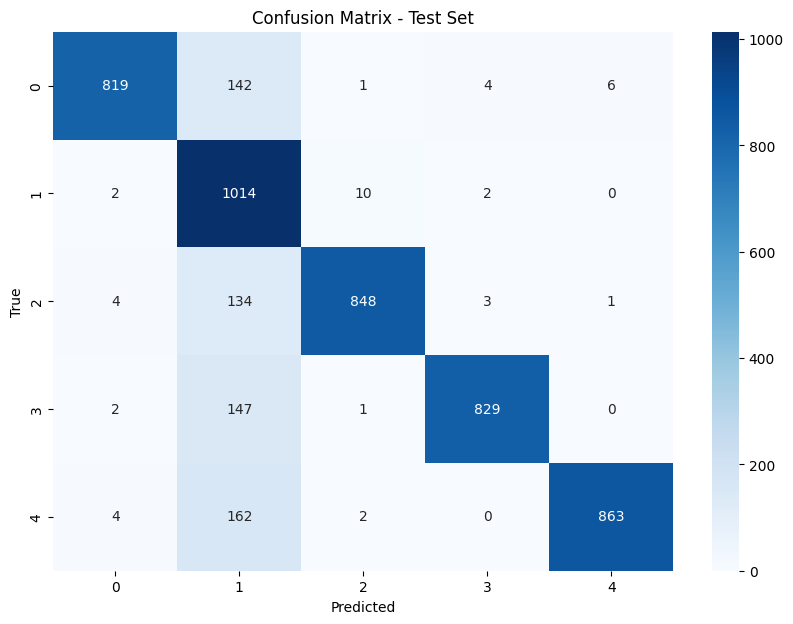

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report for the validation set
valid_class_report = classification_report(y_valid, y_valid_pred, output_dict=True)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Classification report for the test set
test_class_report = classification_report(ytest, y_test_pred, output_dict=True)
test_conf_matrix = confusion_matrix(ytest, y_test_pred)

# Convert classification report to DataFrame for easier plotting
valid_class_report_df = pd.DataFrame(valid_class_report).transpose()
test_class_report_df = pd.DataFrame(test_class_report).transpose()



# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 7))
sns.heatmap(valid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# GREDIENT BOOST

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Training the model
gboost_classifier = make_pipeline(TfidfVectorizer(), GradientBoostingClassifier())
gboost_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
import joblib
joblib.dump(gboost_classifier, '/content/drive/MyDrive/NLP/NLP_PROJECT3/gboost.pth')

['/content/drive/MyDrive/NLP/NLP_PROJECT3/gboost.pth']

In [ ]:
y_valid_pred = gboost_classifier.predict(X_valid)

In [ ]:
# calculate the accuracy of the classifier's predictions on the validation set.
y_valid_pred_accuracy = accuracy_score(y_valid, y_valid_pred)
y_valid_pred_accuracy

0.8227857142857142

In [ ]:
y_test_pred = gboost_classifier.predict(Xtest)

In [ ]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(ytest, y_test_pred)
y_test_pred_accuracy

0.8284

In [ ]:
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5599
           1       0.81      0.83      0.82      5643
           2       0.79      0.77      0.78      5528
           3       0.87      0.85      0.86      5569
           4       0.84      0.87      0.85      5661

    accuracy                           0.82     28000
   macro avg       0.82      0.82      0.82     28000
weighted avg       0.82      0.82      0.82     28000



In [ ]:
print(confusion_matrix(y_valid, y_valid_pred))

[[4445  242  243  131  538]
 [ 197 4689  476  211   70]
 [ 223  607 4247  294  157]
 [ 153  181  291 4746  198]
 [ 478   48  122  102 4911]]


In [ ]:
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       972
           1       0.82      0.84      0.83      1028
           2       0.79      0.78      0.79       990
           3       0.86      0.83      0.84       979
           4       0.85      0.89      0.87      1031

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [ ]:
print(confusion_matrix(ytest, y_test_pred))

[[774  42  42  23  91]
 [ 36 861  83  39   9]
 [ 34 105 776  52  23]
 [ 27  35  66 813  38]
 [ 68  11  14  20 918]]


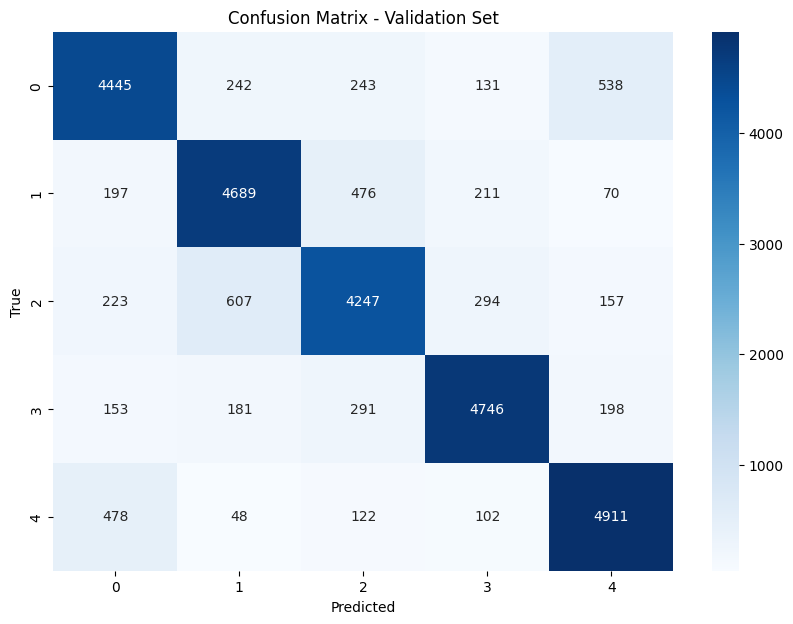

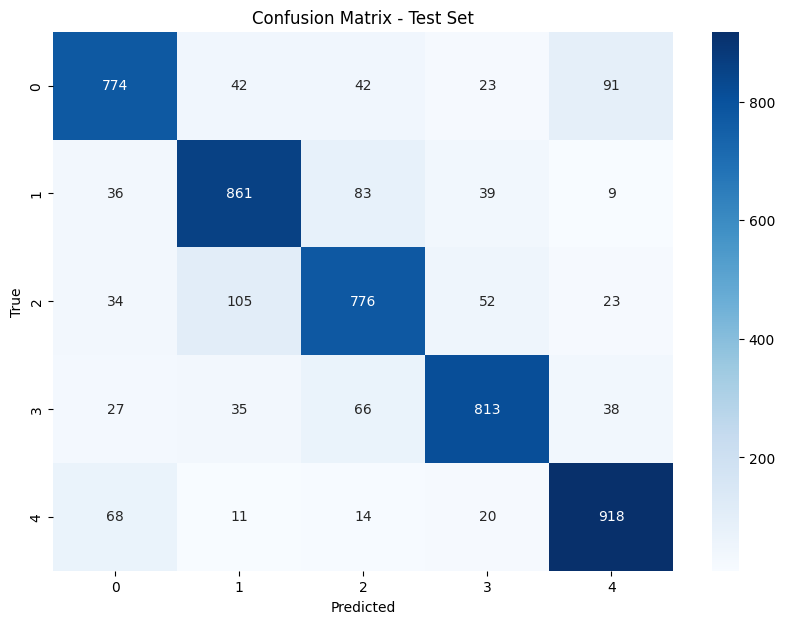

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report for the validation set
valid_class_report = classification_report(y_valid, y_valid_pred, output_dict=True)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Classification report for the test set
test_class_report = classification_report(ytest, y_test_pred, output_dict=True)
test_conf_matrix = confusion_matrix(ytest, y_test_pred)

# Convert classification report to DataFrame for easier plotting
valid_class_report_df = pd.DataFrame(valid_class_report).transpose()
test_class_report_df = pd.DataFrame(test_class_report).transpose()



# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 7))
sns.heatmap(valid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline


In [ ]:
# Training the model
xgboost_classifier = make_pipeline(TfidfVectorizer(), XGBClassifier())
xgboost_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
import joblib
joblib.dump(xgboost_classifier, '/content/drive/MyDrive/NLP/NLP_PROJECT3/xgboost.pth')

['/content/drive/MyDrive/NLP/NLP_PROJECT3/xgboost.pth']

In [ ]:
y_valid_pred = xgboost_classifier.predict(X_valid)

In [ ]:
# calculate the accuracy of the classifier's predictions on the validation set.
y_valid_pred_accuracy = accuracy_score(y_valid, y_valid_pred)
y_valid_pred_accuracy

0.8468571428571429

In [ ]:
y_test_pred = xgboost_classifier.predict(Xtest)

In [ ]:
# calculate the accuracy of the classifier's predictions on the test set.
y_test_pred_accuracy = accuracy_score(ytest, y_test_pred)
y_test_pred_accuracy

0.8786

In [ ]:
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5599
           1       0.84      0.85      0.84      5643
           2       0.82      0.80      0.81      5528
           3       0.88      0.87      0.87      5569
           4       0.87      0.89      0.88      5661

    accuracy                           0.85     28000
   macro avg       0.85      0.85      0.85     28000
weighted avg       0.85      0.85      0.85     28000



In [ ]:
print(confusion_matrix(y_valid, y_valid_pred))

[[4597  194  212  102  494]
 [ 187 4774  445  189   48]
 [ 218  505 4431  280   94]
 [ 136  190  253 4850  140]
 [ 392   27   83   99 5060]]


In [ ]:
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       972
           1       0.87      0.88      0.88      1028
           2       0.85      0.84      0.84       990
           3       0.90      0.88      0.89       979
           4       0.90      0.93      0.92      1031

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [ ]:
print(confusion_matrix(ytest, y_test_pred))

[[832  27  32  14  67]
 [ 29 905  64  24   6]
 [ 32  69 835  45   9]
 [ 17  32  47 859  24]
 [ 42   3  10  14 962]]


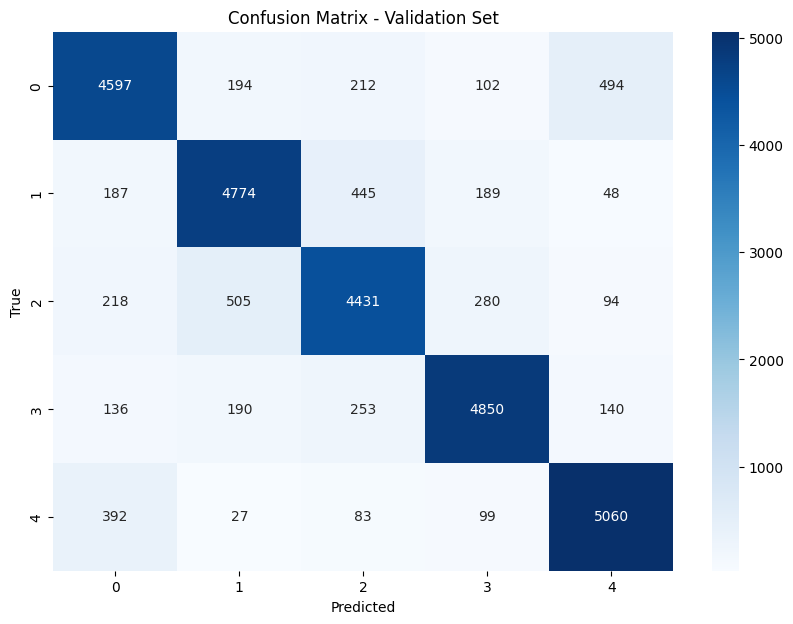

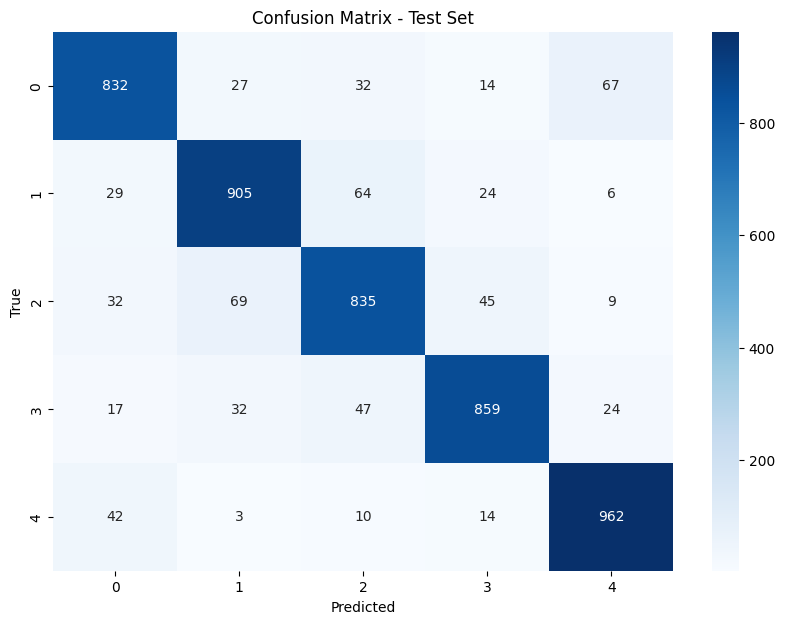

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report for the validation set
valid_class_report = classification_report(y_valid, y_valid_pred, output_dict=True)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)

# Classification report for the test set
test_class_report = classification_report(ytest, y_test_pred, output_dict=True)
test_conf_matrix = confusion_matrix(ytest, y_test_pred)

# Convert classification report to DataFrame for easier plotting
valid_class_report_df = pd.DataFrame(valid_class_report).transpose()
test_class_report_df = pd.DataFrame(test_class_report).transpose()



# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 7))
sns.heatmap(valid_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

product_dict = {'credit_reporting': 1, 'debt_collection': 2, 'mortgages_and_loans': 3,
                'credit_card': 0, 'retail_banking': 4}

# Create and fit the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking'])

# Function for making predictions on new complaints
def predict_complaint(complaint_text):
    prediction = xgboost_classifier.predict([complaint_text])[0]
    return label_encoder.inverse_transform([prediction])[0]

# Function to take user input and classify the complaint
def classify_user_input():
    while True:
        user_input = input("Enter a complaint (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            break
        predicted_category = predict_complaint(user_input)
        print(f"The predicted category for the complaint is: {predicted_category}")

# Start the user input loop
classify_user_input()


Enter a complaint (or type 'exit' to quit): I was charged twice for the same purchase on my credit card, and now my account is overdrawn. I called customer service multiple times, but they haven't resolved the issue.
The predicted category for the complaint is: credit_card
Enter a complaint (or type 'exit' to quit): My credit report shows a delinquent account that I have already paid off. This error is affecting my credit score, and I need it corrected immediately.
The predicted category for the complaint is: credit_reporting
Enter a complaint (or type 'exit' to quit): I keep getting calls from a debt collection agency about a loan that I don't owe. They are threatening legal action, and it's causing me a lot of stress.
The predicted category for the complaint is: debt_collection
Enter a complaint (or type 'exit' to quit): My mortgage payment was not applied correctly, and now I'm being charged late fees. I've tried contacting my loan provider, but they haven't fixed the problem.
The p